# OBJECTIVE: We want to create a model that predicts when an institution or idividual will default on their loan

# Table Of Contents

1. [Load Data](#Bring_Data)<br>
2. [Data Cleansing](#Data_Cleansing)<br>
    2.1 [Encoding Features](#Encoding_Features)<br>
3. [Defining our target lables](#Defining_our_target_lables)<br>
    3.1 [Features and Targets](#Features_and_Targets)<br>
4. [Scaling features and dealing with missing values](#Scaling_features)<br>
    4.1 [Scaling](#Scaling)<br>
5. [Check for correlated features](#correlated_eatures)<br>
    5.1 [Dropping correlated features](#Dropping_orrelated_eatures)<br>
6. [Saving to CSV](#Saving_to_CSV)


# 1. Load Data
<a id="Bring_Data"> </a>

## source:

https://www.lendingclub.com/info/download-data.action

In [1]:
import pandas as pd

In [2]:
print("Loading First Data Set")
# df = pd.read_csv('https://resources.lendingclub.com/LoanStats3b.csv.zip', compression='zip', low_memory=False, skiprows=1)
df = pd.read_csv(r"C:\Users\villeda\Documents\IpyNoteBook\Rapid_training\data\LoanStats3b.csv", low_memory=False, skiprows=1)
print("Loading Second Data Set")
# df2 = pd.read_csv('https://resources.lendingclub.com/LoanStats3c.csv.zip', compression='zip', low_memory=False, skiprows=1)
df2 = pd.read_csv(r"C:\Users\villeda\Documents\IpyNoteBook\Rapid_training\data\LoanStats3c.csv", low_memory=False, skiprows=1)
final_data = pd.concat([df,df2])

Loading First Data Set
Loading Second Data Set


In [3]:
print(final_data.shape)

(423816, 145)


This is loan information from 2012 to 2014. These data contains complete loan data for all loans issued through the time period stated, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. We will use this data set construct a model that predicts where the loan will get paid or not.

### Lets look at the data

In [4]:
final_data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,12000.0,12000.0,12000.0,36 months,7.62%,373.94,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,27050.0,27050.0,27050.0,36 months,10.99%,885.46,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,12000.0,12000.0,12000.0,36 months,11.99%,398.52,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,28000.0,28000.0,28000.0,36 months,7.62%,872.52,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,12000.0,12000.0,12000.0,36 months,10.99%,392.81,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,27600.0,27600.0,27600.0,60 months,19.97%,730.78,D,D5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,11100.0,11100.0,11100.0,36 months,14.98%,384.68,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,9750.0,9750.0,9750.0,36 months,13.98%,333.14,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,12000.0,12000.0,12000.0,36 months,13.53%,407.40,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,4800.0,4800.0,4800.0,36 months,10.99%,157.13,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423816 entries, 0 to 235630
Columns: 145 entries, id to settlement_term
dtypes: float64(108), object(37)
memory usage: 472.1+ MB


# 2. Data Cleansing
<a id="Data_Cleansing"> </a>

There is a lot of information in this data set, including personal information that was not disclosed by the institution so it appears as N/A. Hence we need to <br>
- Remove empty and not relevant columns <br>
- Define target variable: we will use loan_status as our target variable.
- Clean empty rows.
- Scale data

In [6]:
dataset = final_data.iloc[:,2:111] 
empty_cols = [i for i in range(45,72)]   #more empty columns
dataset = dataset.drop(dataset.columns[empty_cols],axis=1)
print(f"Number of columns dropped:{len(empty_cols)}")

Number of columns dropped:27


In [7]:
dataset.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,12000.0,12000.0,12000.0,36 months,7.62%,373.94,A,A3,Systems Engineer,3 years,...,0.0,3.0,100.0,100.0,0.0,0.0,233004.0,46738.0,14800.0,53404.0
1,27050.0,27050.0,27050.0,36 months,10.99%,885.46,B,B2,Team Leadern Customer Ops & Systems,10+ years,...,0.0,1.0,100.0,25.0,0.0,0.0,138554.0,70186.0,35700.0,33054.0
2,12000.0,12000.0,12000.0,36 months,11.99%,398.52,B,B3,LTC,10+ years,...,0.0,3.0,100.0,1.0,0.0,0.0,365874.0,44327.0,10700.0,57674.0
3,28000.0,28000.0,28000.0,36 months,7.62%,872.52,A,A3,Area Sales Manager,5 years,...,0.0,5.0,100.0,16.7,0.0,0.0,850886.0,199739.0,42200.0,196686.0
4,12000.0,12000.0,12000.0,36 months,10.99%,392.81,B,B2,Project Manager,4 years,...,0.0,4.0,100.0,0.0,0.0,0.0,29700.0,7137.0,18100.0,0.0


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423816 entries, 0 to 235630
Data columns (total 82 columns):
loan_amnt                         423810 non-null float64
funded_amnt                       423810 non-null float64
funded_amnt_inv                   423810 non-null float64
term                              423810 non-null object
int_rate                          423810 non-null object
installment                       423810 non-null float64
grade                             423810 non-null object
sub_grade                         423810 non-null object
emp_title                         398837 non-null object
emp_length                        403904 non-null object
home_ownership                    423810 non-null object
annual_inc                        423810 non-null float64
verification_status               423810 non-null object
issue_d                           423810 non-null object
loan_status                       423810 non-null object
pymnt_plan                   

### This is still a pretty big set of features, after cearfully looking at all of them I propse the following reduced set:

In [9]:
features = ['funded_amnt','emp_length','annual_inc','home_ownership','grade',
            "last_pymnt_amnt", "mort_acc", "pub_rec", "int_rate", "open_acc","num_actv_rev_tl",
            "mo_sin_rcnt_rev_tl_op","mo_sin_old_rev_tl_op","bc_util","bc_open_to_buy",
            "avg_cur_bal","acc_open_past_24mths",'loan_status', 'term', 'total_pymnt']
Final_data = dataset[features]

### Let change the interest rate to a float:

In [10]:
Final_data[["int_rate"]].head(5)

,int_rate
0,7.62%
1,10.99%
2,11.99%
3,7.62%
4,10.99%


# can we cast to float type right away?

In [11]:
# Final_data["int_rate"].astype(float)

In [12]:
Final_data["int_rate"] = Final_data["int_rate"].str.slice_replace(start=-1, repl='').astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [14]:
Final_data.head()

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status,term,total_pymnt
0,12000.0,3 years,96500.0,MORTGAGE,A,2927.22,1.0,0.0,7.62,17.0,5.0,10.0,118.0,83.5,2441.0,11783.0,4.0,Fully Paid,36 months,13397.54000
1,27050.0,10+ years,55000.0,OWN,B,6074.19,4.0,0.0,10.99,14.0,4.0,16.0,326.0,53.9,16473.0,9570.0,3.0,Fully Paid,36 months,31752.53000
2,12000.0,10+ years,130000.0,MORTGAGE,B,398.28,3.0,0.0,11.99,9.0,5.0,4.0,193.0,93.0,3567.0,36362.0,4.0,Fully Paid,36 months,14346.47905
3,28000.0,5 years,325000.0,MORTGAGE,A,23915.86,5.0,0.0,7.62,15.0,5.0,5.0,229.0,67.1,13901.0,53306.0,6.0,Fully Paid,36 months,29150.98000
4,12000.0,4 years,60000.0,RENT,B,3775.55,0.0,0.0,10.99,15.0,7.0,1.0,48.0,15.9,15216.0,476.0,8.0,Fully Paid,36 months,13988.61000


### We also need to change emp_length and term to a numerical value:

In [15]:
Final_data["emp_length"] = Final_data["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True).astype(float)
Final_data["term"] = Final_data["term"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0','months':''}, regex = True).astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
Final_data.head()

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status,term,total_pymnt
0,12000.0,3.0,96500.0,MORTGAGE,A,2927.22,1.0,0.0,7.62,17.0,5.0,10.0,118.0,83.5,2441.0,11783.0,4.0,Fully Paid,36.0,13397.54000
1,27050.0,10.0,55000.0,OWN,B,6074.19,4.0,0.0,10.99,14.0,4.0,16.0,326.0,53.9,16473.0,9570.0,3.0,Fully Paid,36.0,31752.53000
2,12000.0,10.0,130000.0,MORTGAGE,B,398.28,3.0,0.0,11.99,9.0,5.0,4.0,193.0,93.0,3567.0,36362.0,4.0,Fully Paid,36.0,14346.47905
3,28000.0,5.0,325000.0,MORTGAGE,A,23915.86,5.0,0.0,7.62,15.0,5.0,5.0,229.0,67.1,13901.0,53306.0,6.0,Fully Paid,36.0,29150.98000
4,12000.0,4.0,60000.0,RENT,B,3775.55,0.0,0.0,10.99,15.0,7.0,1.0,48.0,15.9,15216.0,476.0,8.0,Fully Paid,36.0,13988.61000


In [17]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423816 entries, 0 to 235630
Data columns (total 20 columns):
funded_amnt              423810 non-null float64
emp_length               403904 non-null float64
annual_inc               423810 non-null float64
home_ownership           423810 non-null object
grade                    423810 non-null object
last_pymnt_amnt          423810 non-null float64
mort_acc                 416315 non-null float64
pub_rec                  423810 non-null float64
int_rate                 423810 non-null float64
open_acc                 423810 non-null float64
num_actv_rev_tl          396069 non-null float64
mo_sin_rcnt_rev_tl_op    396068 non-null float64
mo_sin_old_rev_tl_op     396068 non-null float64
bc_util                  412087 non-null float64
bc_open_to_buy           412340 non-null float64
avg_cur_bal              396057 non-null float64
acc_open_past_24mths     416315 non-null float64
loan_status              423810 non-null object
term      

In [18]:
print("Distinct Grades:", Final_data.grade.unique())
print("Distinct home_ownership:", set(Final_data.home_ownership))

Distinct Grades: ['A' 'B' 'D' 'C' 'E' 'F' 'G' nan]
Distinct home_ownership: {nan, 'MORTGAGE', 'NONE', 'RENT', 'OWN', 'ANY', 'OTHER'}


# 2.1 Encoding Features
<a id="Encoding_Features"> </a>
### We need to encode string values to be represented by numerical values:
- Grade = {'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1}
- home_ownership = {"MORTGAGE":6,"RENT":5,"OWN":4,"OTHER":3,"NONE":2,"ANY":1}

In [19]:
Final_data['grade'] = Final_data['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})
Final_data["home_ownership"] = Final_data["home_ownership"].map({"MORTGAGE":6,"RENT":5,"OWN":4,"OTHER":3,"NONE":2,"ANY":1})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
Final_data[['grade']].head()

,grade
0,7.0
1,6.0
2,6.0
3,7.0
4,6.0


# 3. Defining our target lables:
<a id="Defining_our_target_lables"> </a>

In [21]:
print("Distinct loan_status:", set(Final_data.loan_status))
Final_data.groupby(['loan_status'])[['annual_inc']].count()

Distinct loan_status: {nan, 'Late (16-30 days)', 'Late (31-120 days)', 'Current', 'Charged Off', 'Fully Paid', 'Default', 'In Grace Period'}


,annual_inc
loan_status,
Charged Off,70829
Current,11925
Default,1
Fully Paid,340444
In Grace Period,201
Late (16-30 days),73
Late (31-120 days),337


The only 2 significant leble asre "Fully Paid" and "Charged Off"

In [22]:
Final_data = Final_data[(Final_data['loan_status']=="Fully Paid") | (Final_data['loan_status']=="Charged Off")]

In [23]:
Final_data= Final_data.replace({"loan_status": {"Fully Paid":0, "Charged Off":1}})

In [24]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411273 entries, 0 to 235628
Data columns (total 20 columns):
funded_amnt              411273 non-null float64
emp_length               391832 non-null float64
annual_inc               411273 non-null float64
home_ownership           411273 non-null float64
grade                    411273 non-null float64
last_pymnt_amnt          411273 non-null float64
mort_acc                 403778 non-null float64
pub_rec                  411273 non-null float64
int_rate                 411273 non-null float64
open_acc                 411273 non-null float64
num_actv_rev_tl          383532 non-null float64
mo_sin_rcnt_rev_tl_op    383531 non-null float64
mo_sin_old_rev_tl_op     383531 non-null float64
bc_util                  399679 non-null float64
bc_open_to_buy           399920 non-null float64
avg_cur_bal              383520 non-null float64
acc_open_past_24mths     403778 non-null float64
loan_status              411273 non-null int64
term     

# 3.1 Features and Targets:
<a id="Features_and_Targets"> </a>
Defining our target lables

In [25]:
features = set(list(Final_data.columns))
features.remove("loan_status")
features = list(features)
target = ["loan_status"]
print('features:', features)
print('target:', target)

features: ['mo_sin_rcnt_rev_tl_op', 'mo_sin_old_rev_tl_op', 'open_acc', 'avg_cur_bal', 'int_rate', 'mort_acc', 'acc_open_past_24mths', 'term', 'bc_util', 'annual_inc', 'grade', 'total_pymnt', 'home_ownership', 'num_actv_rev_tl', 'bc_open_to_buy', 'pub_rec', 'emp_length', 'last_pymnt_amnt', 'funded_amnt']
target: ['loan_status']


# 4. Scaling features and dealing with missing values
<a id="Scaling_features"> </a>

There are two ways of dealing with missing values:
- padding missing values or filling them with some kind of estimate (mean)
- dropping  rows with missing values

with this dataset we might get away with simply dropping rows with missing data.

In [26]:
# Final_data_ = Final_data.dropna()
Final_data_ = Final_data.fillna(Final_data.mean())

In [27]:
Final_data_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411273 entries, 0 to 235628
Data columns (total 20 columns):
funded_amnt              411273 non-null float64
emp_length               411273 non-null float64
annual_inc               411273 non-null float64
home_ownership           411273 non-null float64
grade                    411273 non-null float64
last_pymnt_amnt          411273 non-null float64
mort_acc                 411273 non-null float64
pub_rec                  411273 non-null float64
int_rate                 411273 non-null float64
open_acc                 411273 non-null float64
num_actv_rev_tl          411273 non-null float64
mo_sin_rcnt_rev_tl_op    411273 non-null float64
mo_sin_old_rev_tl_op     411273 non-null float64
bc_util                  411273 non-null float64
bc_open_to_buy           411273 non-null float64
avg_cur_bal              411273 non-null float64
acc_open_past_24mths     411273 non-null float64
loan_status              411273 non-null int64
term     

We removed about 3000 rows.

# 4.1 Scaling
<a id="Scaling"> </a>

In [28]:
from sklearn.preprocessing import StandardScaler

The standard score of a sample x is calculated as:

z = (x - u) / s <br>

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

In [29]:
sclaer = StandardScaler() #instance of preprocessing
Final_data_[features] = pd.DataFrame(sclaer.fit_transform(Final_data_[features]), columns = features)
# data_clean['loan_status'] = Final_data['loan_status']
# data_clean['loan_status'].value_counts()

In [30]:
Final_data_.head()

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status,term,total_pymnt
0,-0.299476,-0.928888,0.429087,0.890293,1.387048,-0.252133,-0.383997,-0.323443,-1.439964,1.134412,-0.248869,-0.220361,-0.730107,0.694300,-0.452627,-0.110954,-0.075437,0,-0.58481,-0.256095
1,1.520061,1.125154,-0.344829,-2.171730,0.620423,0.263337,1.006702,-0.323443,-0.672232,0.532558,-0.589591,0.167135,1.637470,-0.444565,0.617771,-0.252862,-0.437197,0,-0.58481,1.472015
2,-0.299476,1.125154,1.053815,0.890293,0.620423,-0.666370,0.543136,-0.323443,-0.444419,-0.470533,-0.248869,-0.607858,0.123587,1.059815,-0.366732,1.465171,-0.075437,0,-0.58481,-0.166753
3,1.634916,-0.342019,4.690290,0.890293,1.387048,3.185782,1.470269,-0.323443,-1.439964,0.733176,-0.248869,-0.543275,0.533360,0.063307,0.421572,2.551702,0.648083,0,-0.58481,1.227081
4,-0.299476,-0.635454,-0.251586,-0.640718,0.620423,-0.113177,-0.847563,-0.323443,-0.672232,0.733176,0.432574,-0.801606,-1.526888,-1.906622,0.521884,-0.836013,1.371604,0,-0.58481,-0.200447


# 5. Check for correlated features
<a id="correlated_features"> </a>
often you want to make inprove your model's learning time and having less inputs inproves this.

- Calculate correlation matrix
- Plot matrix

In [31]:
import matplotlib.pyplot as plt
import seaborn as sn

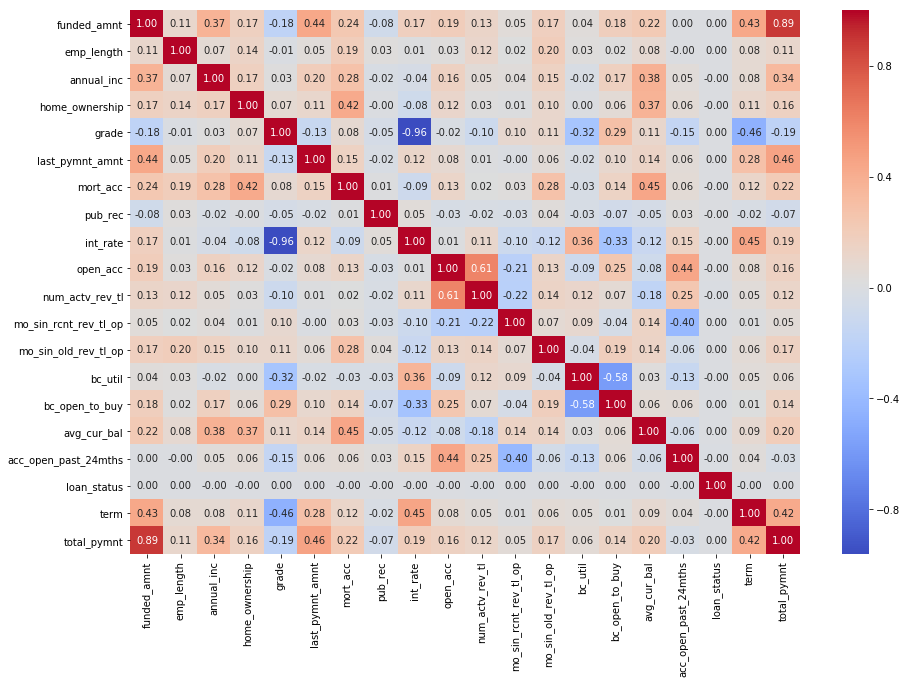

In [32]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,10)) 
cm_df = sn.heatmap(Final_data_.corr(),annot=True, fmt = ".2f", cmap = "coolwarm", ax=ax)

# 5.1 Dropping correlated features
<a id="Dropping_correlated_features"> </a>

In [33]:
Final_data_.drop(["total_pymnt", "num_actv_rev_tl"],axis=1, inplace=True)

In [34]:
Final_data_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411273 entries, 0 to 235628
Data columns (total 18 columns):
funded_amnt              411273 non-null float64
emp_length               411273 non-null float64
annual_inc               411273 non-null float64
home_ownership           411273 non-null float64
grade                    411273 non-null float64
last_pymnt_amnt          411273 non-null float64
mort_acc                 411273 non-null float64
pub_rec                  411273 non-null float64
int_rate                 411273 non-null float64
open_acc                 411273 non-null float64
mo_sin_rcnt_rev_tl_op    411273 non-null float64
mo_sin_old_rev_tl_op     411273 non-null float64
bc_util                  411273 non-null float64
bc_open_to_buy           411273 non-null float64
avg_cur_bal              411273 non-null float64
acc_open_past_24mths     411273 non-null float64
loan_status              411273 non-null int64
term                     411273 non-null float64
dtypes: f

# 6. Saving to CSV
<a id="Saving_to_CSV"> </a>

In [35]:
Final_data_.to_csv("datasets_clean.csv")